## This notebook plots coral bleaching severity each year from 1990 to 2024, making maps of bleaching statistics using a standard 1°C bleaching threshold ("Threshold 1") and a variability-based bleaching threshold ("Threshold 2"):

• Maximum degree heating weeks each year

• Maximum bleaching index each year

• Number of days with some bleaching each year

In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Read in data (created in PR_xygrid.ipynb)

In [2]:
file = '/glade/u/home/klblack/PRheat/coral_bleaching/PR_heatwave/PR_coral_bleach.nc'
ds = xr.open_dataset(file)

In [3]:
ds

<xarray.Dataset>
Dimensions:           (latitude: 35, longitude: 90, year: 45)
Coordinates:
    number            int64 ...
  * latitude          (latitude) float64 23.25 23.0 22.75 ... 15.25 15.0 14.75
  * longitude         (longitude) float64 -82.5 -82.25 -82.0 ... -60.5 -60.25
  * year              (year) int64 1980 1981 1982 1983 ... 2021 2022 2023 2024
    valid_time        datetime64[ns] ...
Data variables:
    max_dhw1          (year, latitude, longitude) float32 ...
    max_dhw2          (year, latitude, longitude) float64 ...
    bleach_index1     (year, latitude, longitude) float32 ...
    bleach_index2     (year, latitude, longitude) float64 ...
    num_days_bleach1  (year, latitude, longitude) float64 ...
    num_days_bleach2  (year, latitude, longitude) float64 ...

## Coral bleaching statistics:
* max bleaching every year
* max coral bleaching index each year
* number of days with bleaching (DHW >= 4 or bleach index > 1)

In [4]:
# Bounding box
lat_min, lat_max = 15., 21.
lon_min, lon_max = -69., -63.

## Make some maps of the bleaching stats

### Maximum accumulated degree heating weeks each year (Corals generally start to bleach at >4 DHWs; DHWs accumulate over the preceeding 12 weeks)

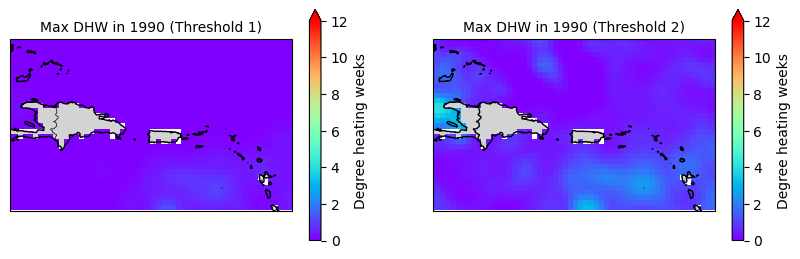

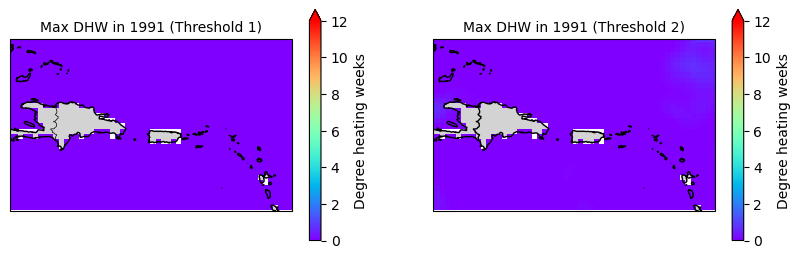

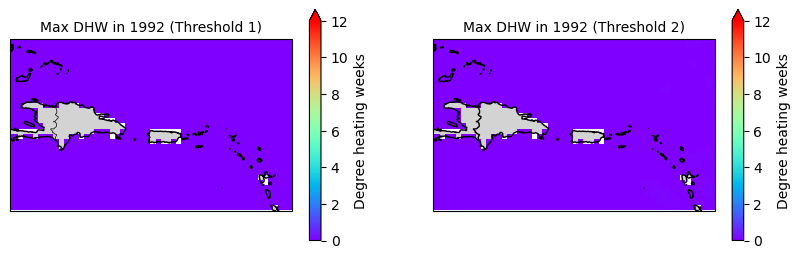

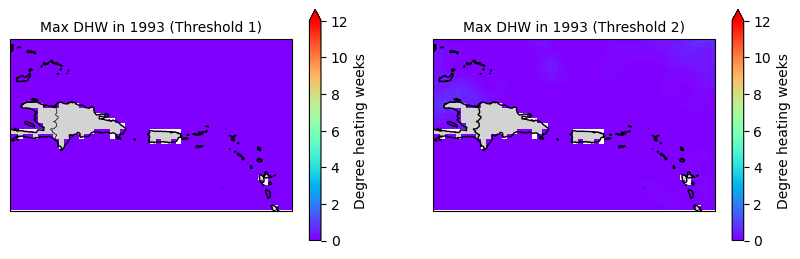

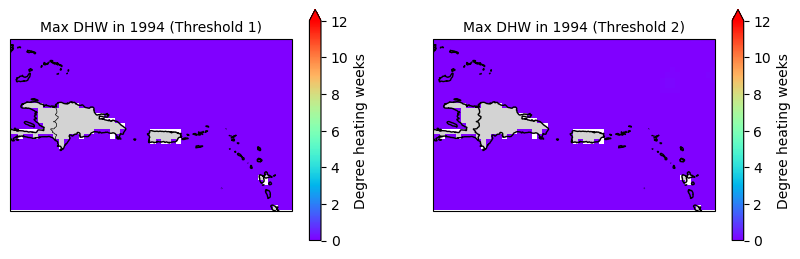

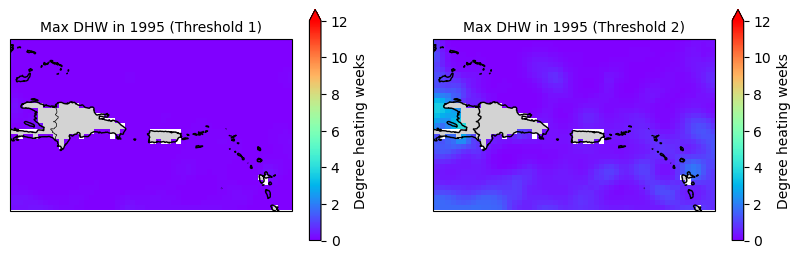

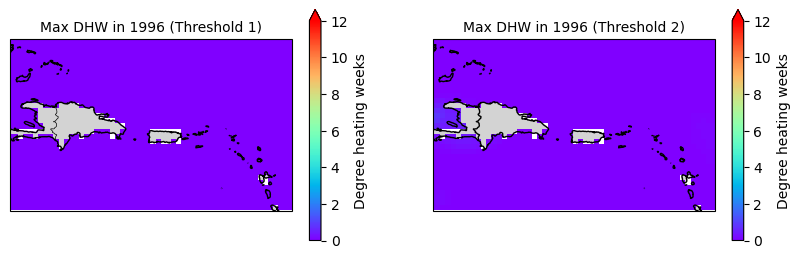

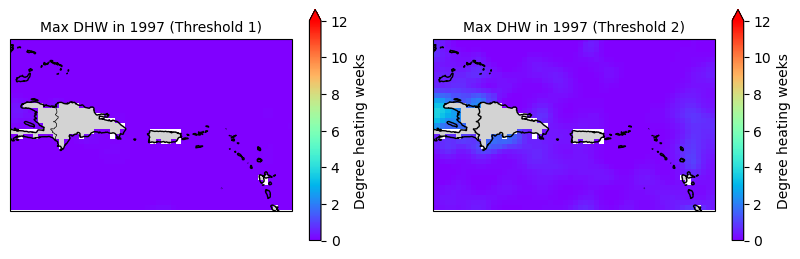

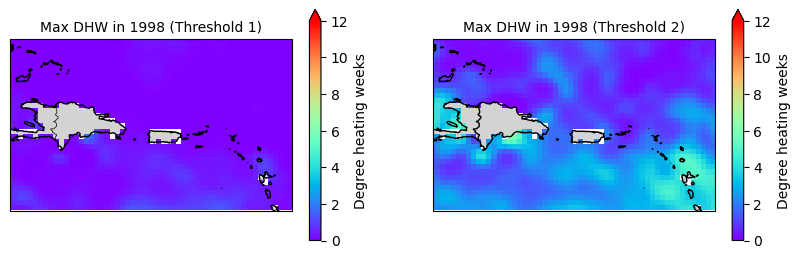

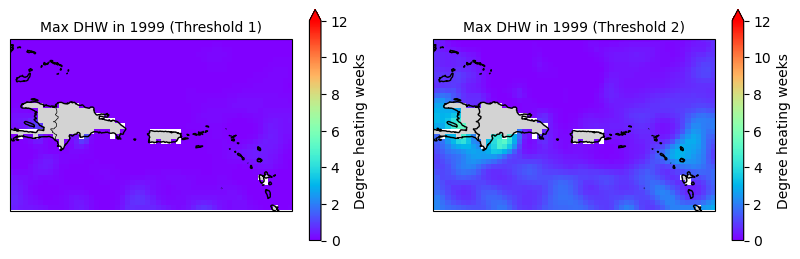

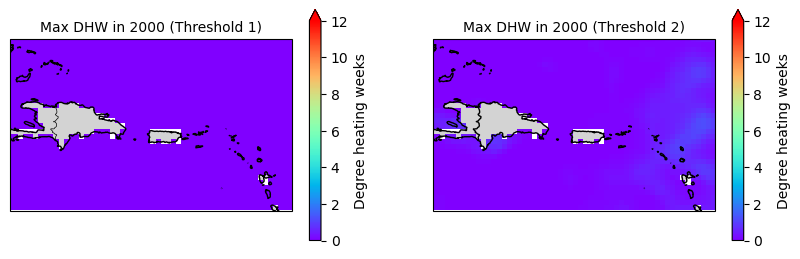

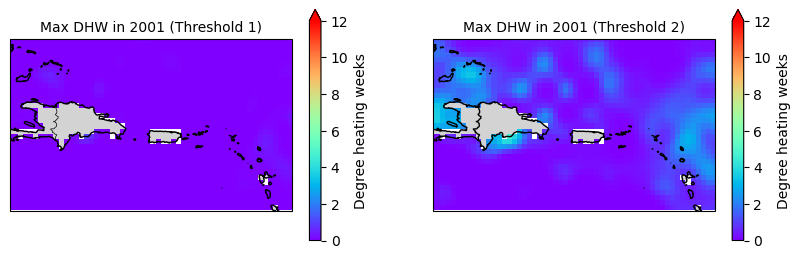

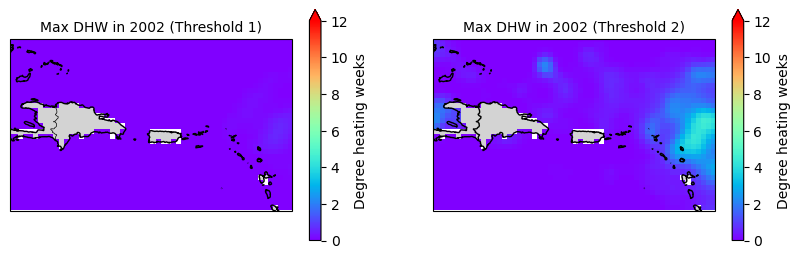

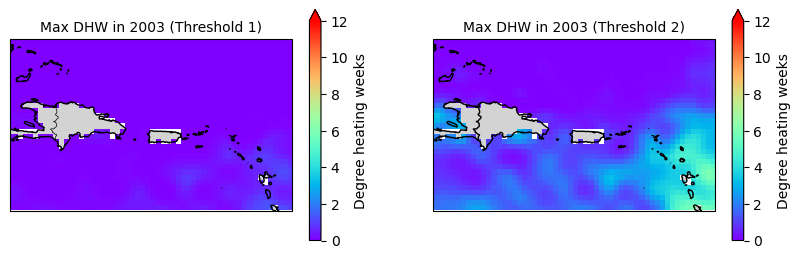

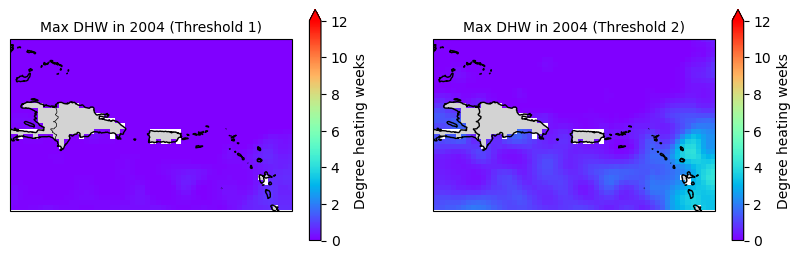

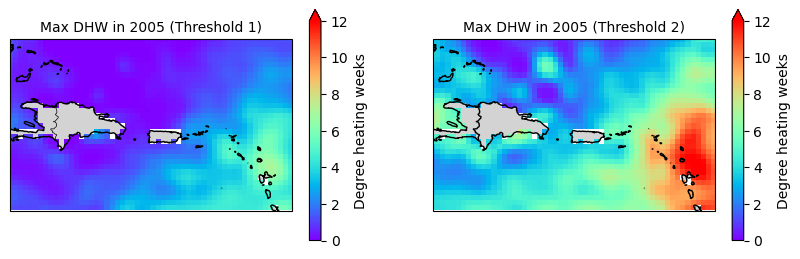

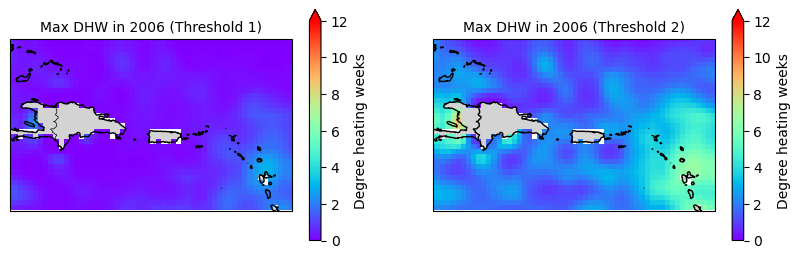

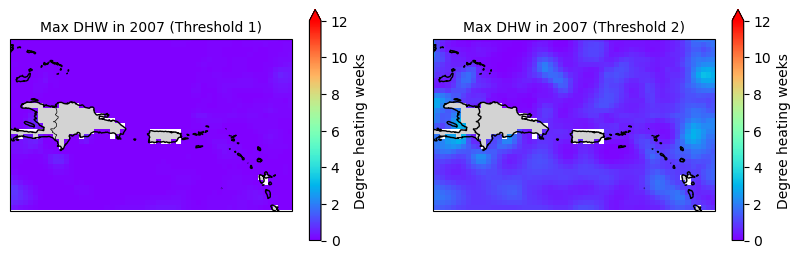

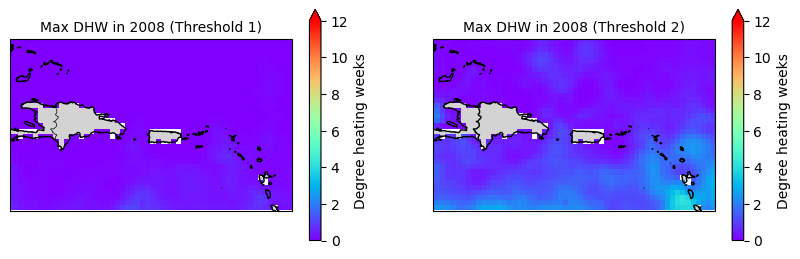

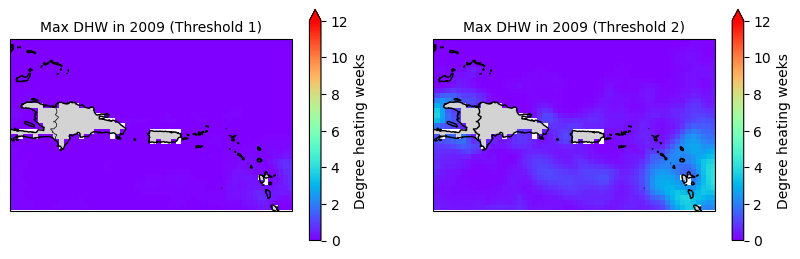

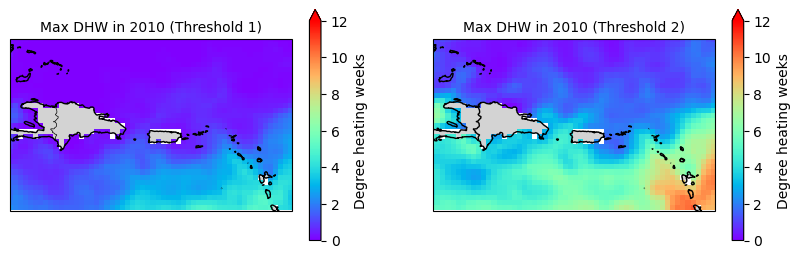

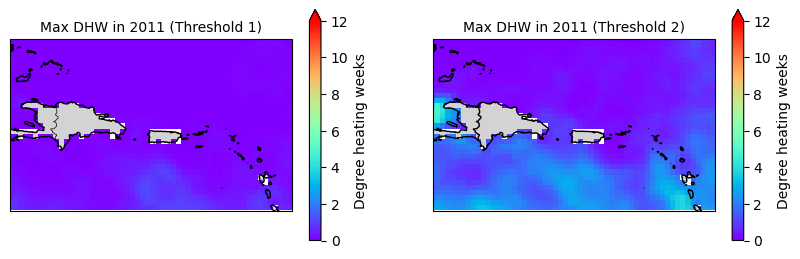

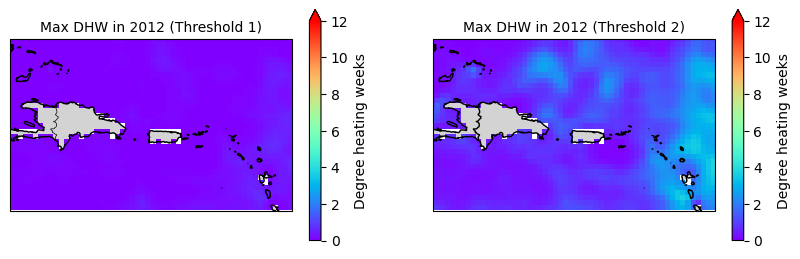

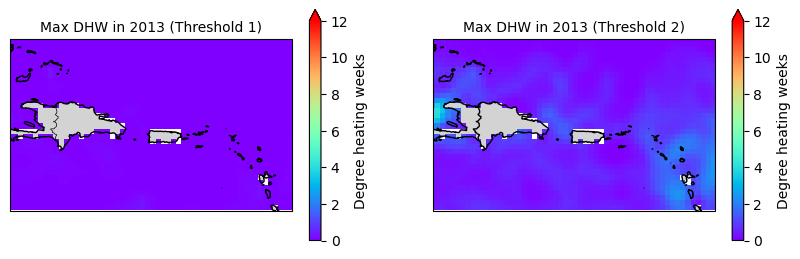

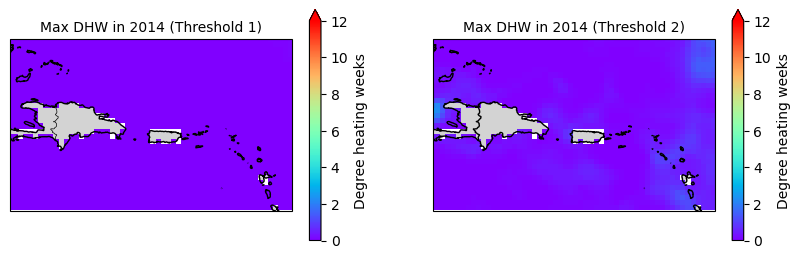

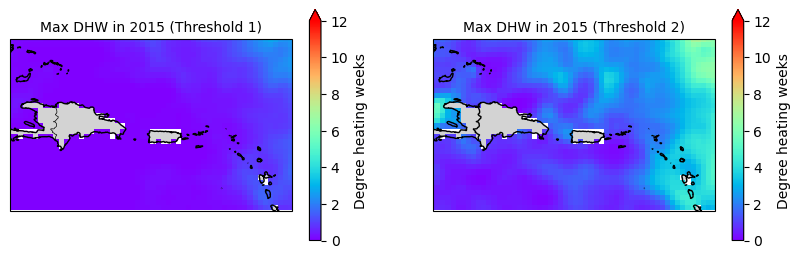

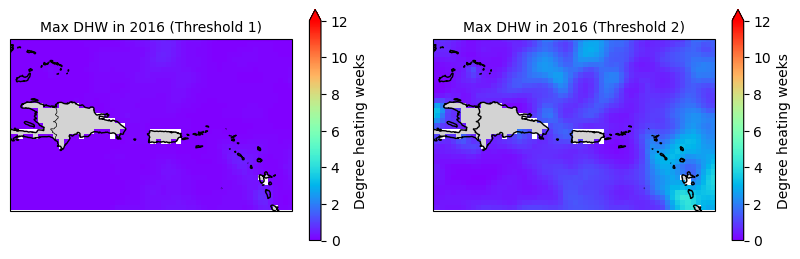

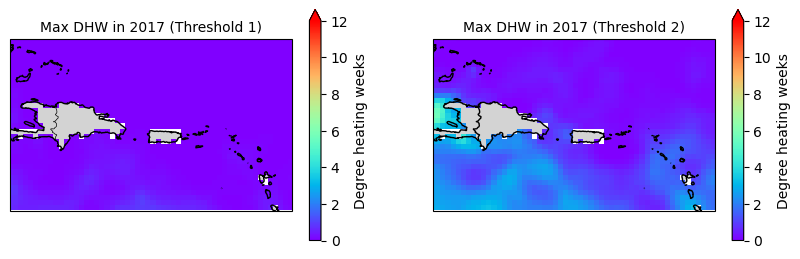

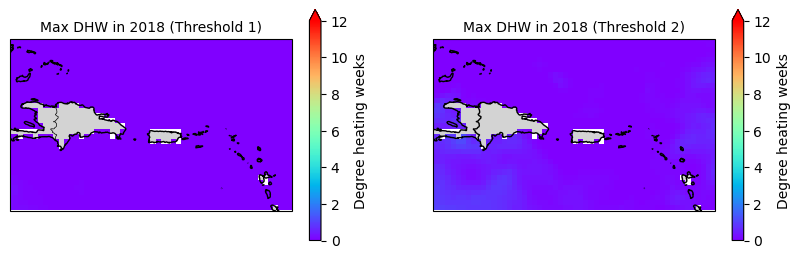

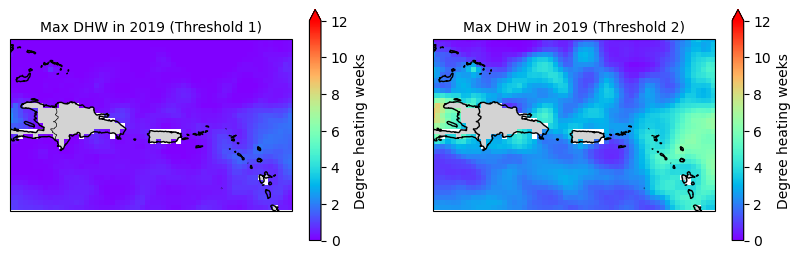

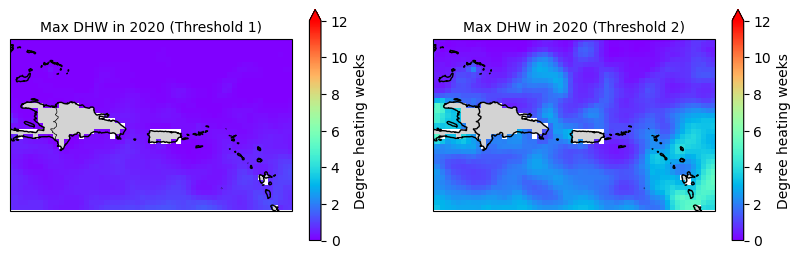

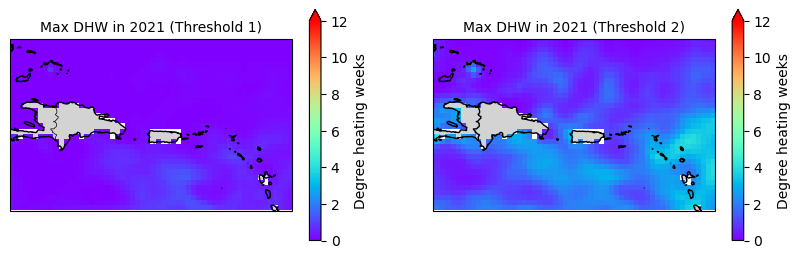

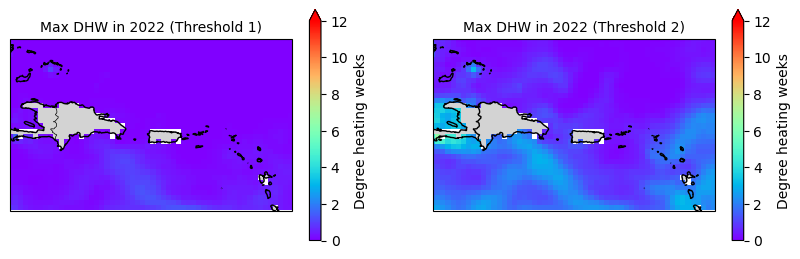

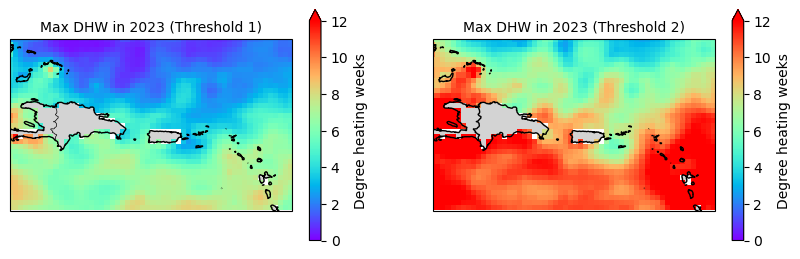

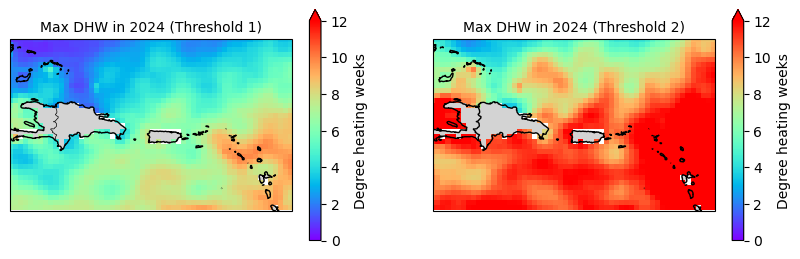

In [5]:
cmap = 'rainbow'

year=1990

for year in np.arange(1990,2025,1):

    fig = plt.figure(figsize=(10, 3))
    
    ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min-5, lon_max+2.8, lat_min-0.4, lat_max+2], crs=ccrs.PlateCarree())
    pc=ax.pcolormesh(ds.longitude, ds.latitude, ds.max_dhw1.sel(year=year), cmap=cmap,
                     vmin=0,vmax=12,
                     transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, color='lightgray')
    
    
    ax.set_title("Max DHW in " + str(year) + " (Threshold 1)",fontsize=10)
    cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Degree heating weeks')
    
    
    ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min-5, lon_max+2.8, lat_min-0.4, lat_max+2], crs=ccrs.PlateCarree())
    
    pc=ax.pcolormesh(ds.longitude, ds.latitude, ds.max_dhw2.sel(year=year), cmap=cmap,
                     vmin=0,vmax=12,
                     transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=1)
    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.set_title("Max DHW in " + str(year) + " (Threshold 2)",fontsize=10)
    cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Degree heating weeks')
    fig.savefig('/glade/work/kristenk/figs/PR_coralbleach_year'+str(year)+'.png', bbox_inches='tight', dpi=300, format='png');

    plt.show()
    


### Total number of days with coral bleaching conditions each year (i.e., days with accumulated DHWs > 4)

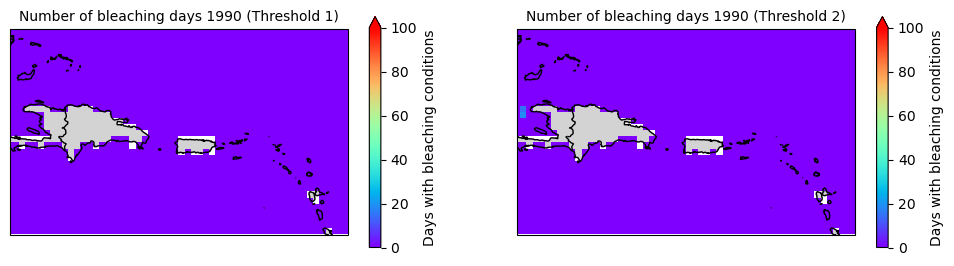

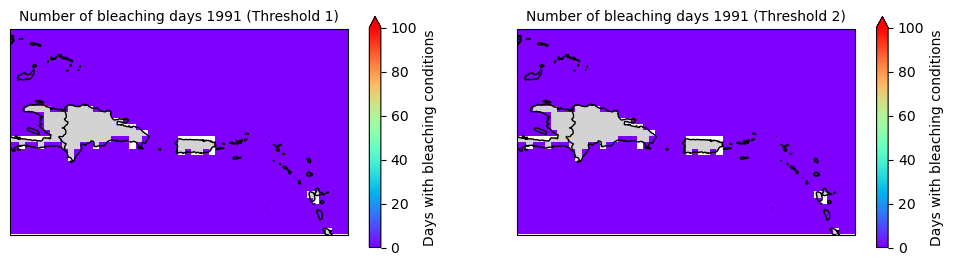

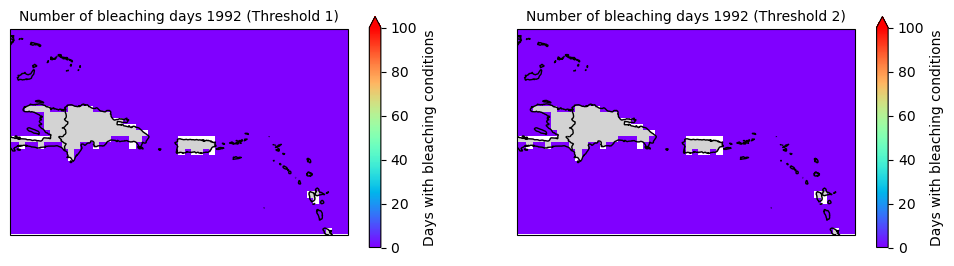

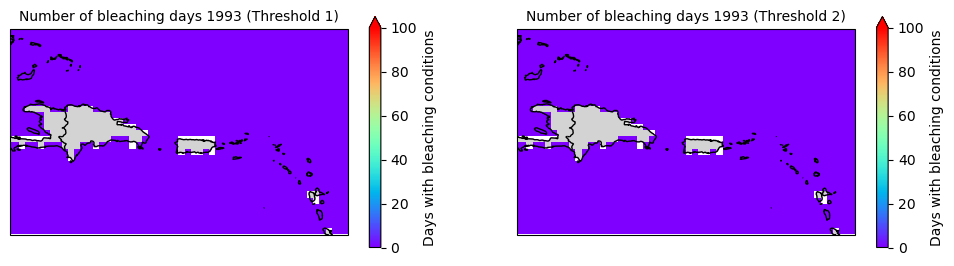

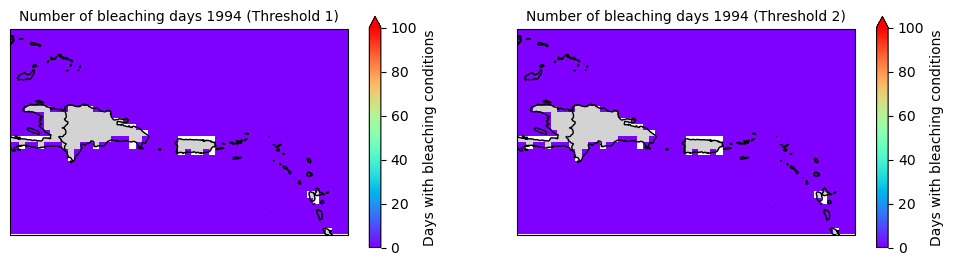

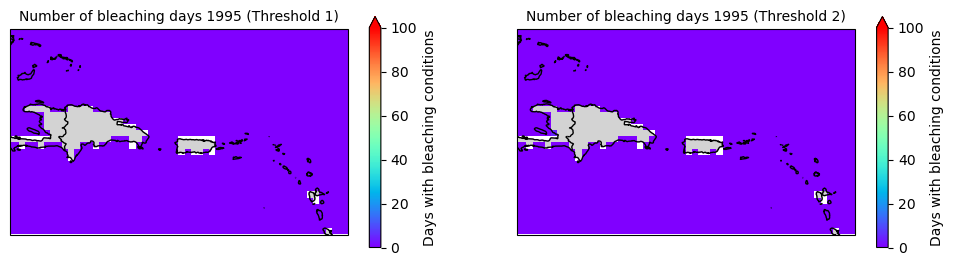

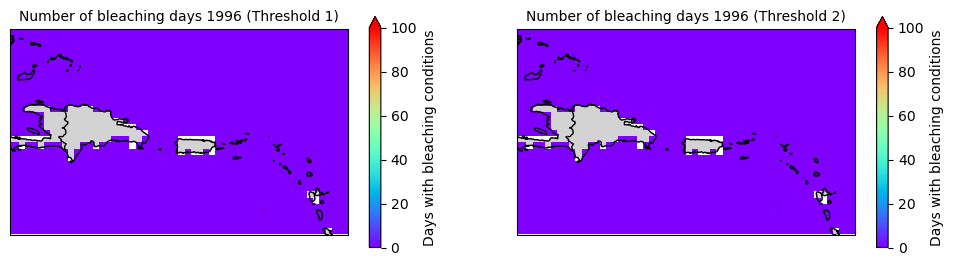

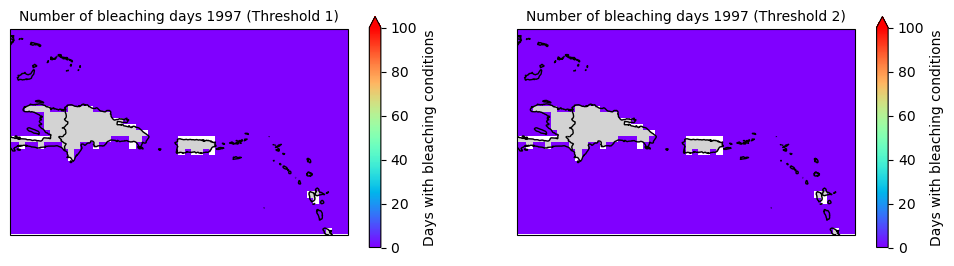

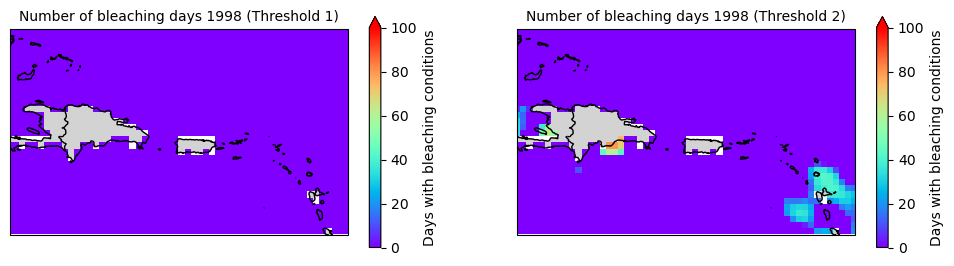

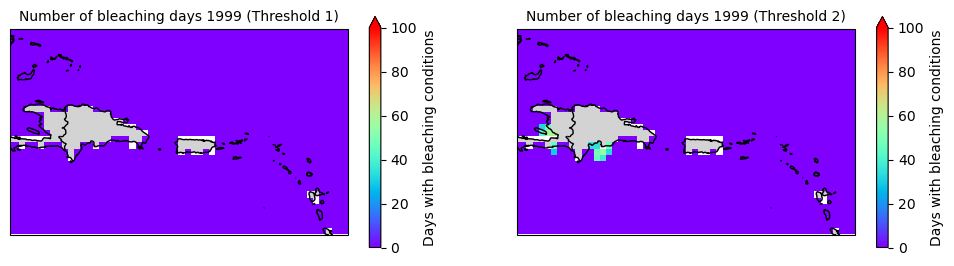

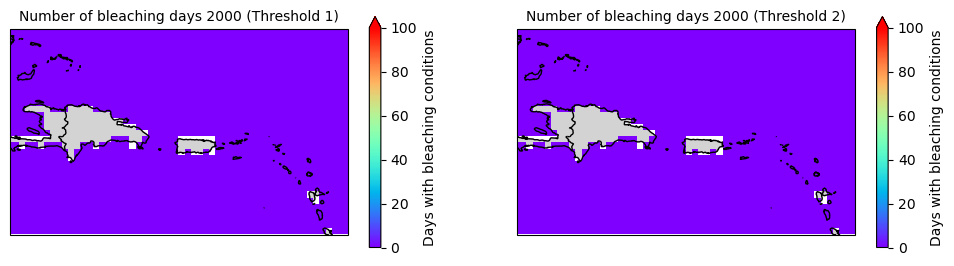

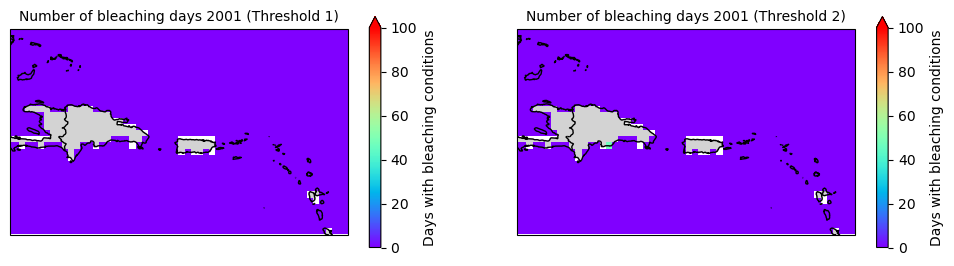

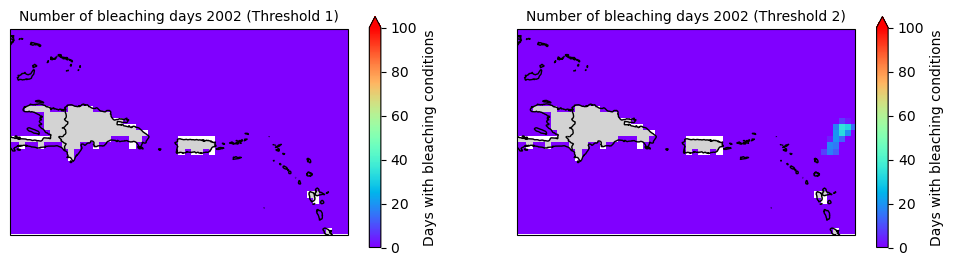

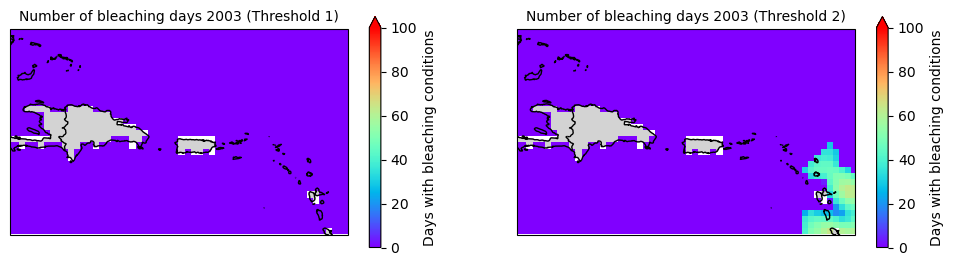

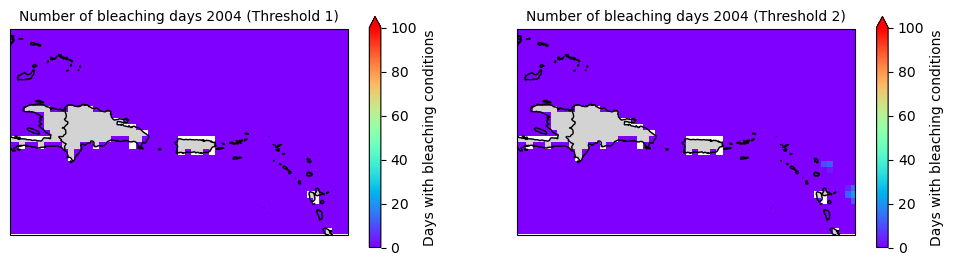

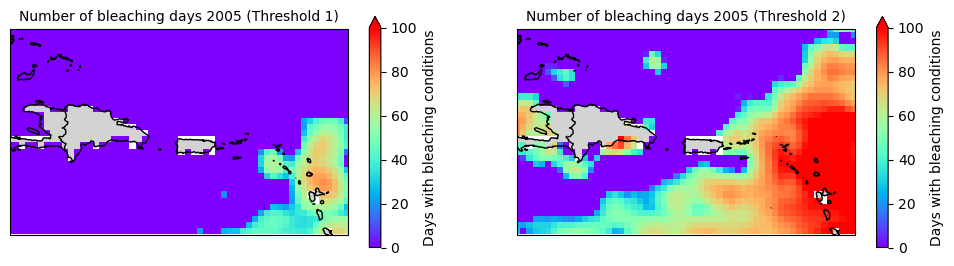

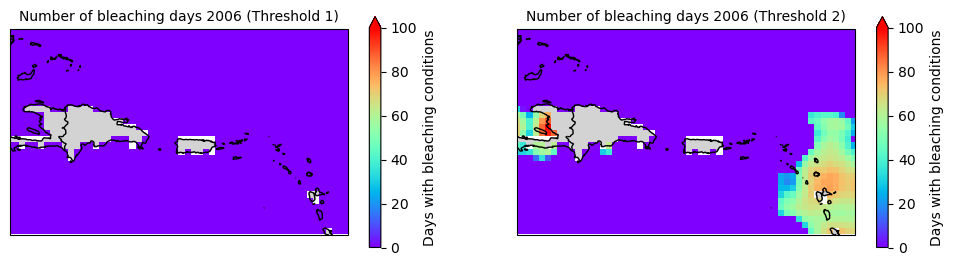

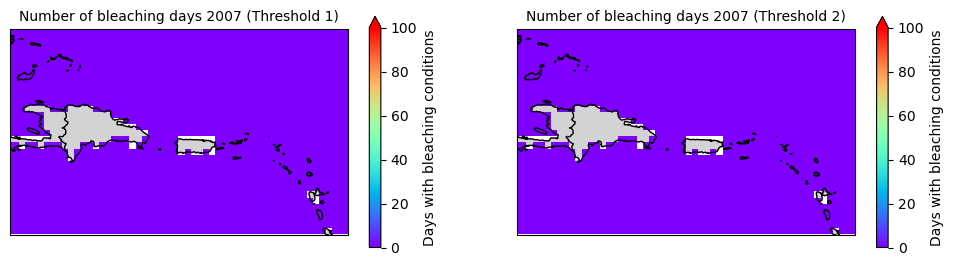

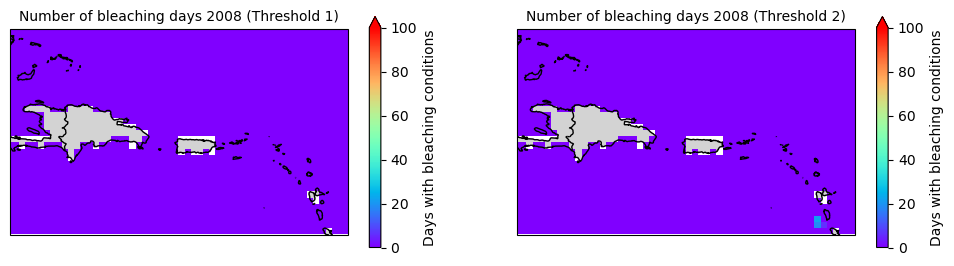

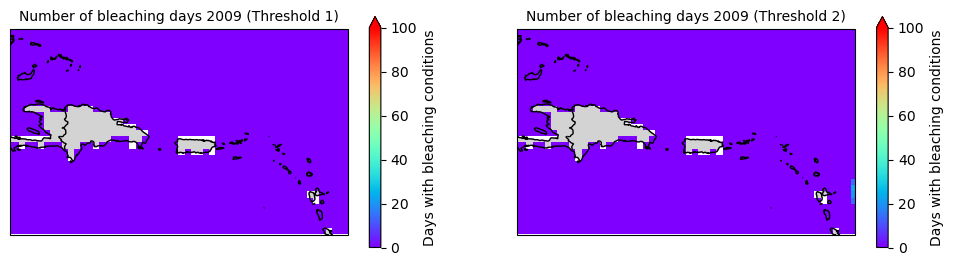

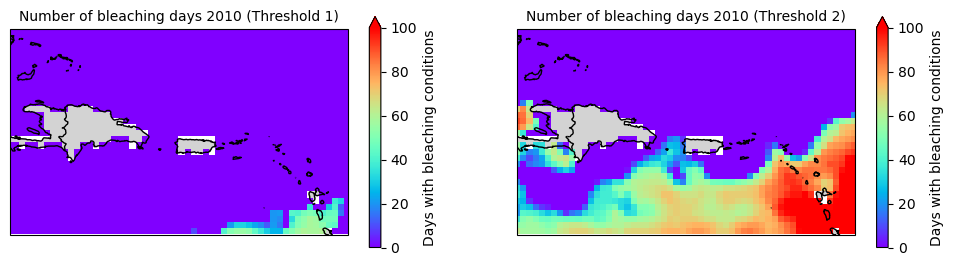

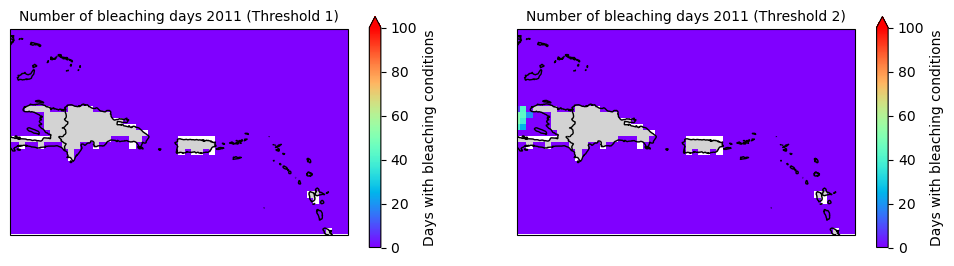

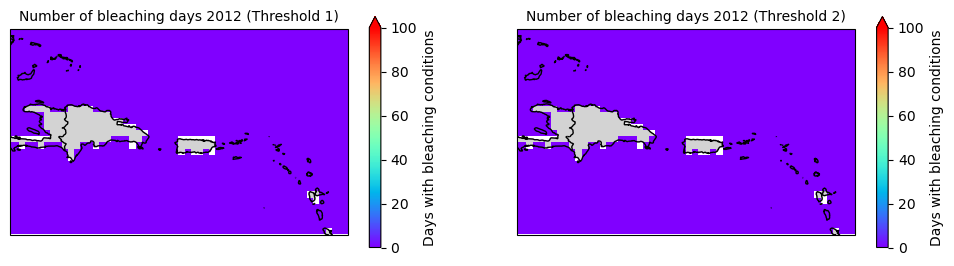

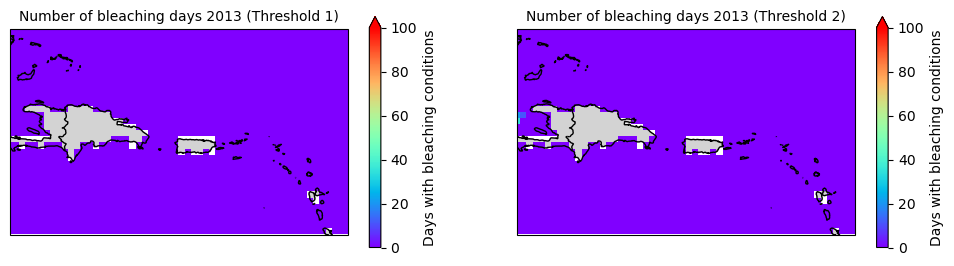

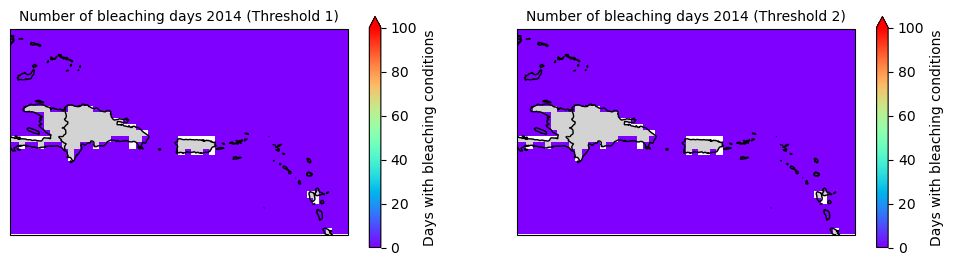

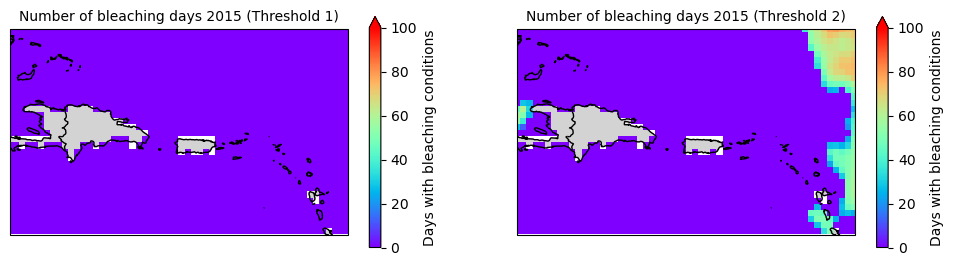

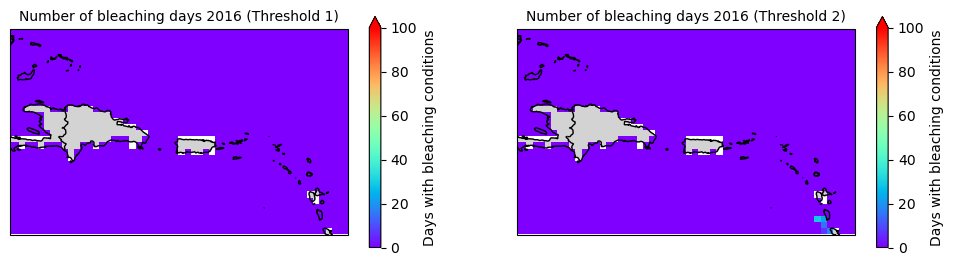

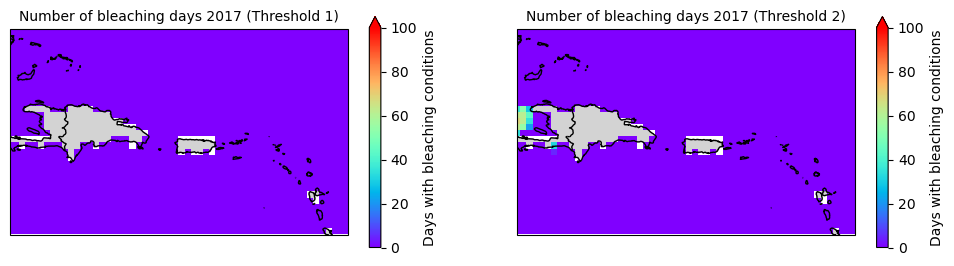

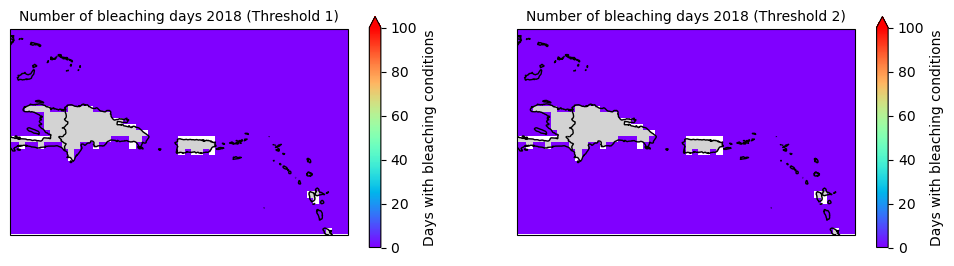

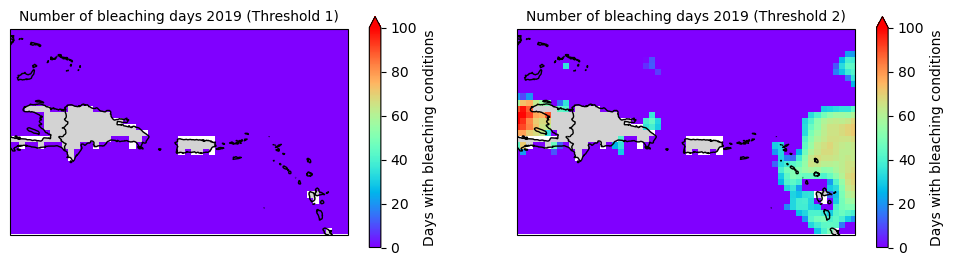

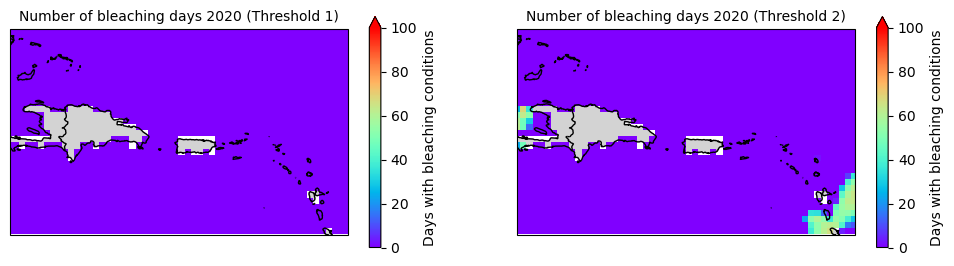

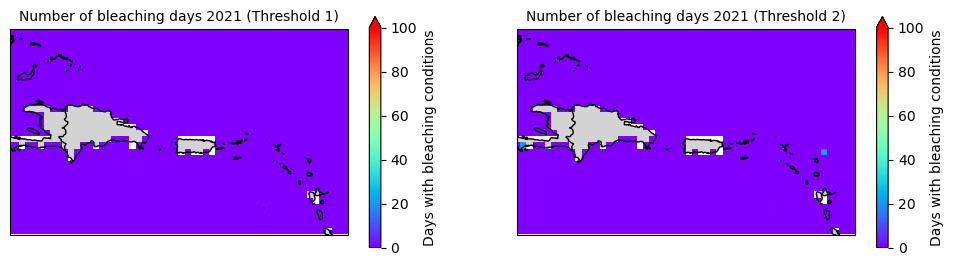

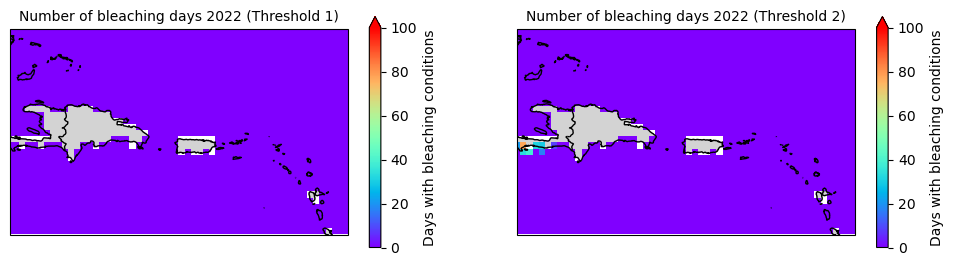

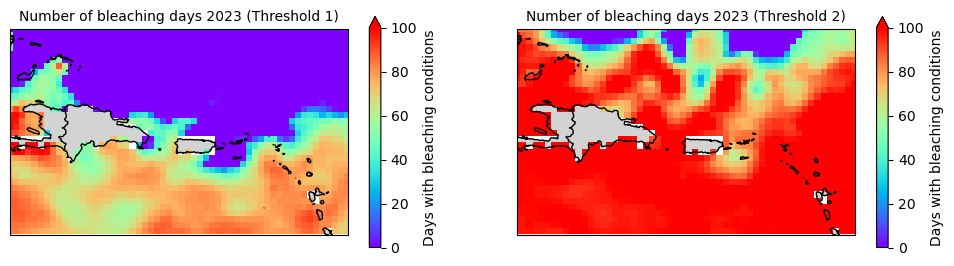

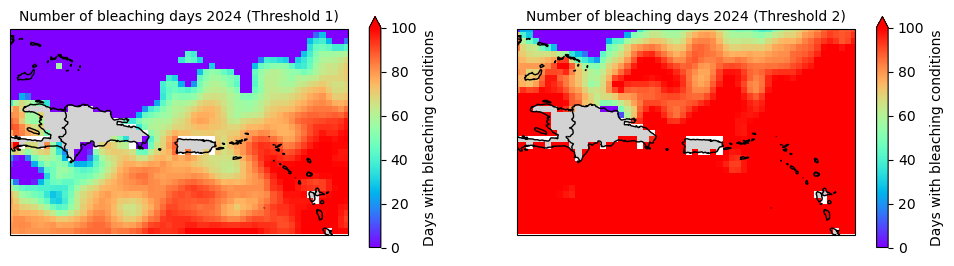

In [7]:
cmap = 'rainbow'

for year in np.arange(1990,2025,1):

    fig = plt.figure(figsize=(12, 3))
    
    ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min-5, lon_max+2.8, lat_min-0.4, lat_max+2], crs=ccrs.PlateCarree())
    pc=ax.pcolormesh(ds.longitude, ds.latitude, ds.num_days_bleach1.sel(year=year), cmap=cmap,
                     vmin=0,vmax=100,
                     transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=1)
    ax.add_feature(cfeature.LAND, color='lightgray')
    
    
    ax.set_title("Number of bleaching days " + str(year) + " (Threshold 1)",fontsize=10)
    cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Days with bleaching conditions')
    
    
    ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
    ax.set_extent([lon_min-5, lon_max+2.8, lat_min-0.4, lat_max+2], crs=ccrs.PlateCarree())
    
    pc=ax.pcolormesh(ds.longitude, ds.latitude, ds.num_days_bleach2.sel(year=year), cmap=cmap,
                     vmin=0,vmax=100,
                     transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=1)
    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.set_title("Number of bleaching days " + str(year) + " (Threshold 2)",fontsize=10)
    cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='Days with bleaching conditions')
    
    fig.savefig('/glade/work/kristenk/figs/PR_coralbleachdays_year'+str(year)+'.png', bbox_inches='tight', dpi=300, format='png');

    plt.show()
    

### Plot the bleaching index severity for each year

In [8]:
colorlist = ['paleturquoise', 'yellow', 'orange', 'red']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('bleach', colorlist, N=4)

lons, lats = ds.longitude, ds.latitude

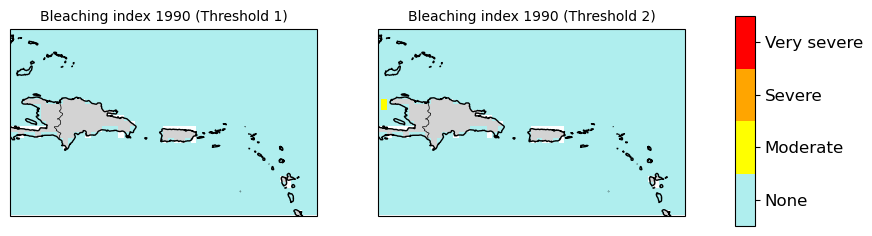

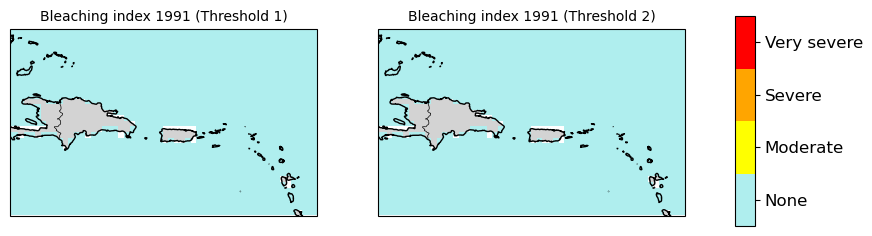

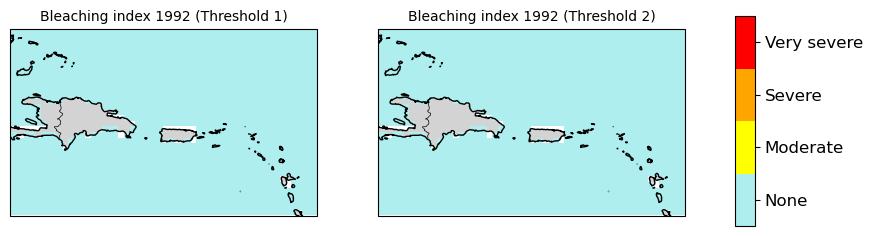

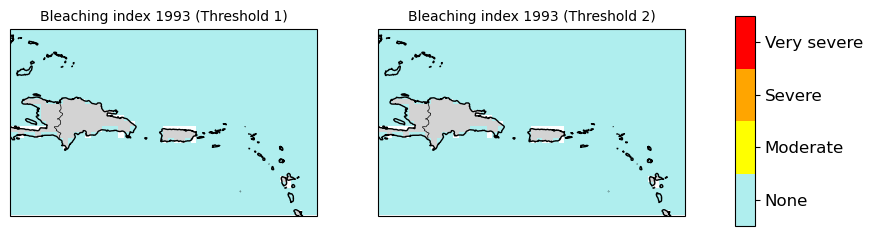

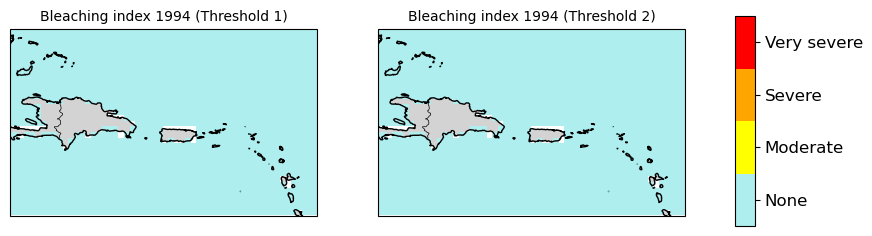

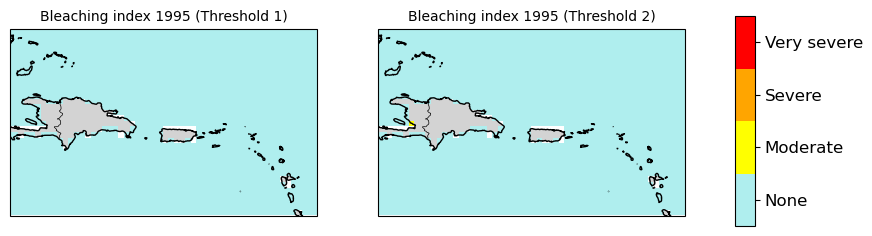

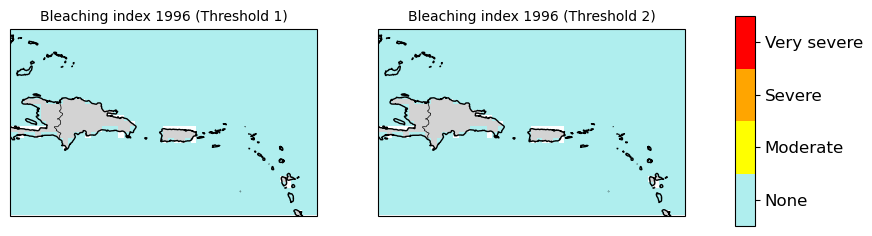

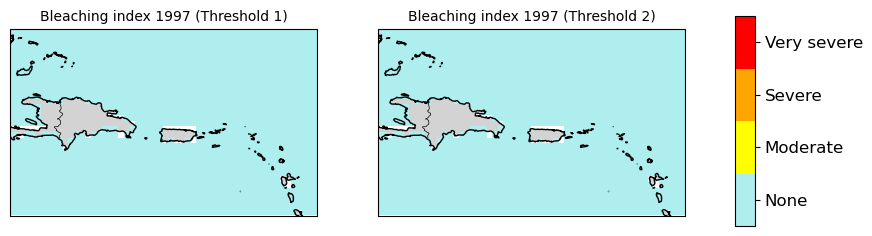

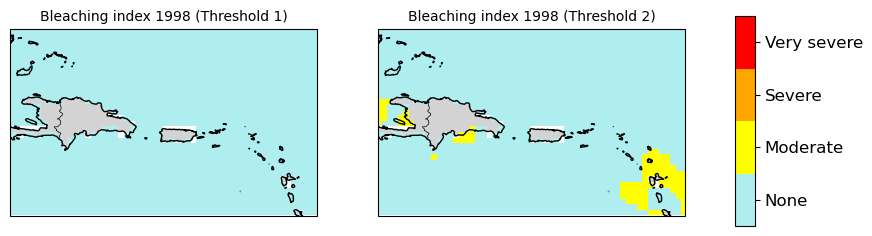

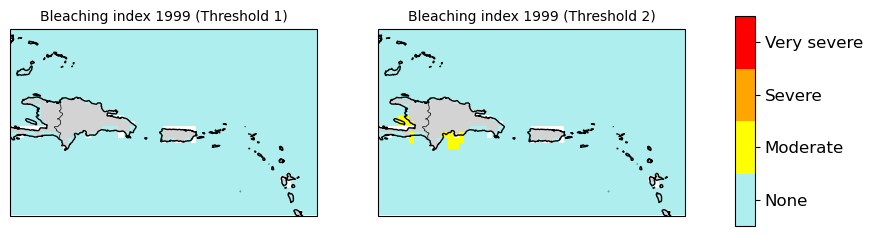

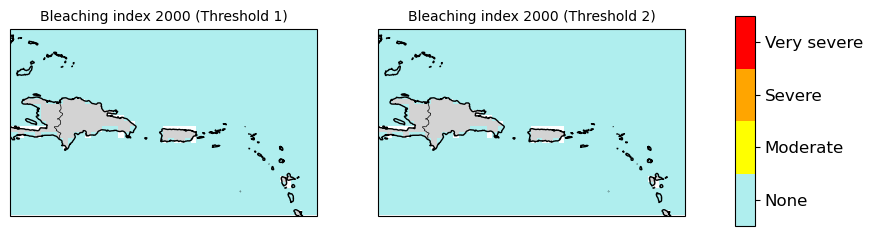

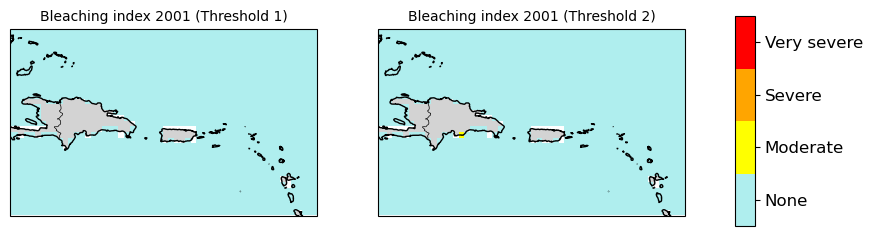

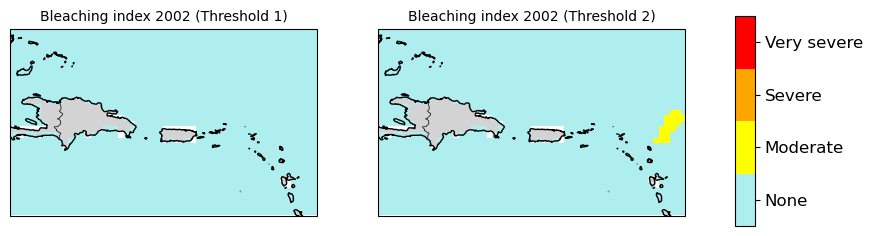

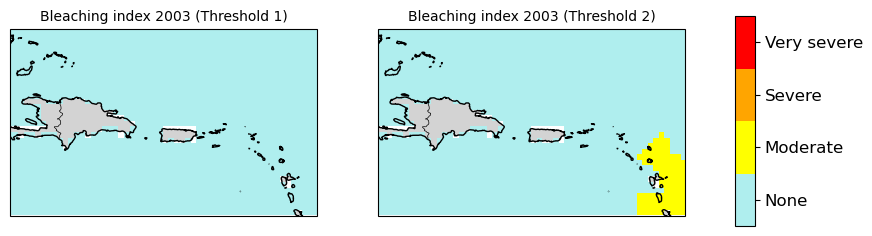

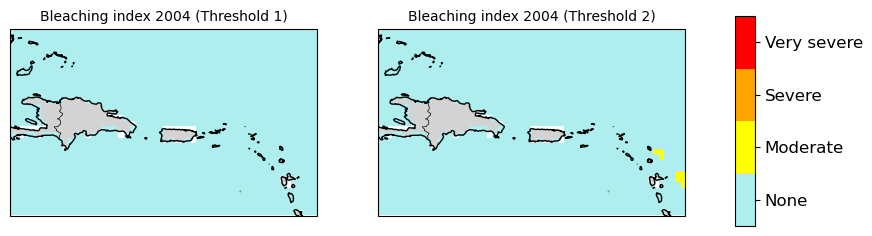

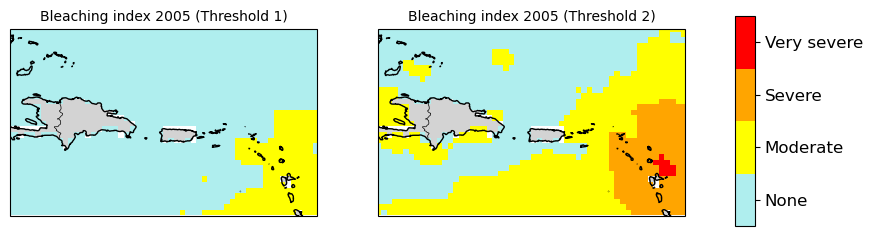

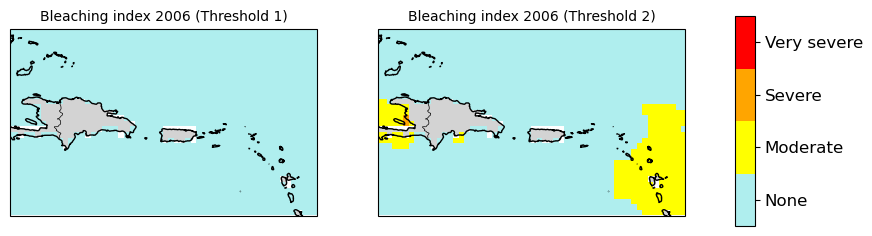

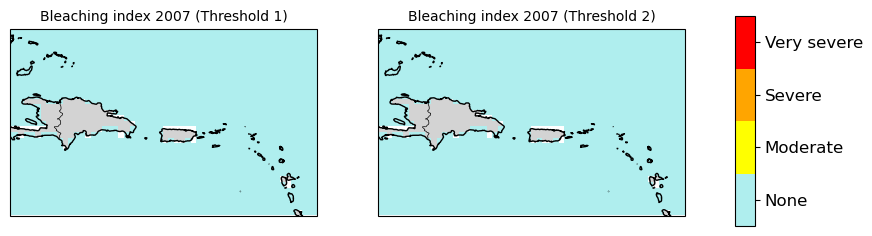

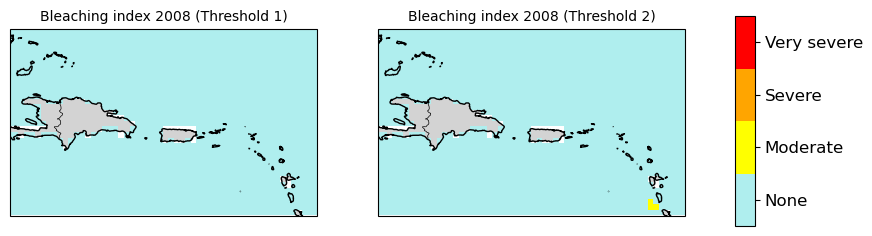

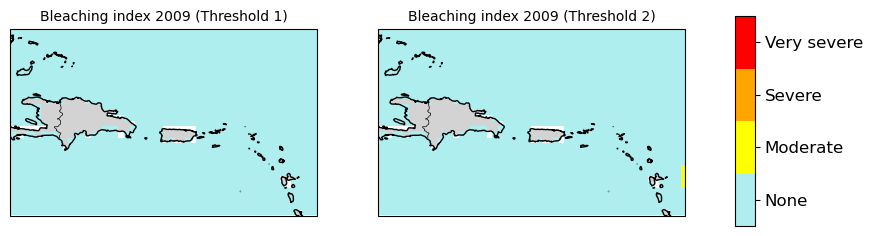

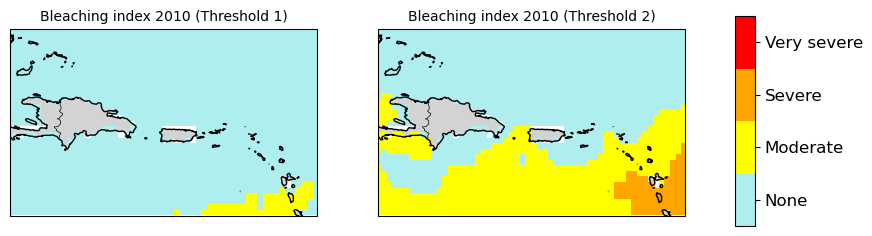

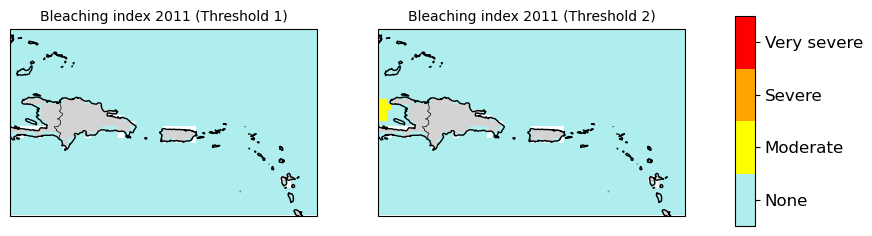

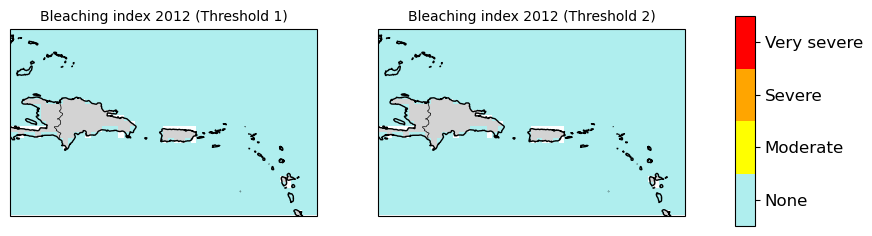

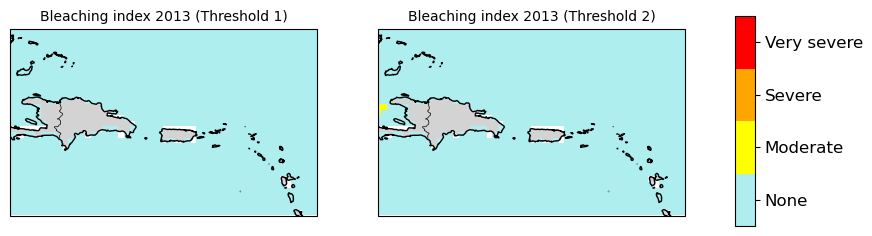

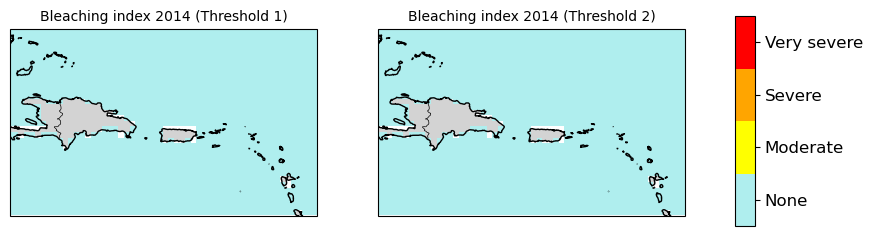

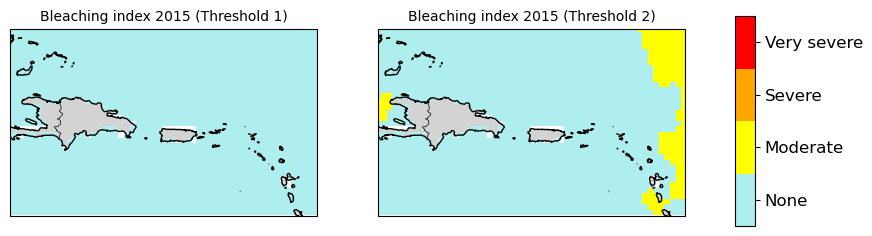

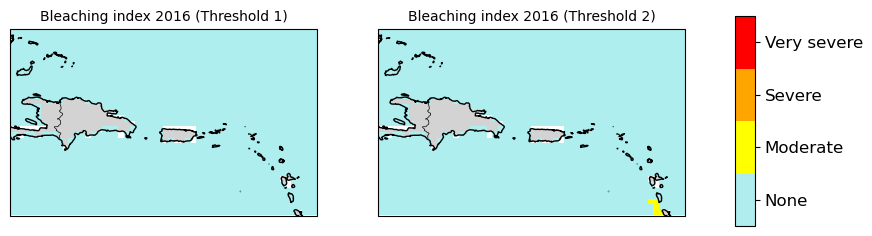

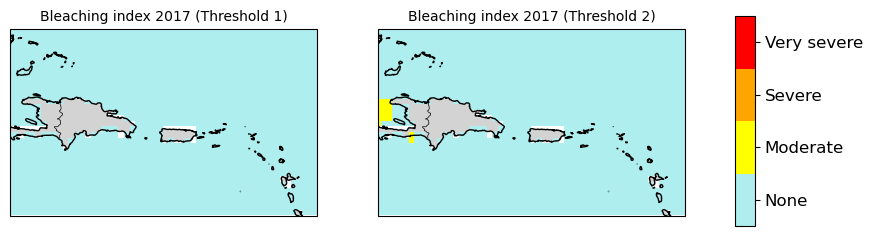

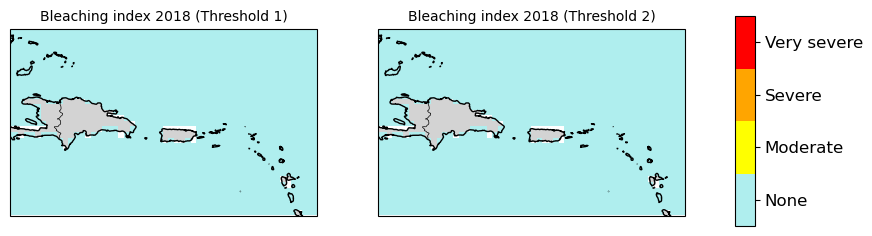

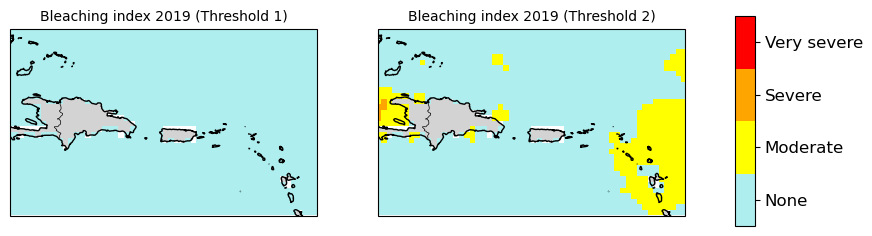

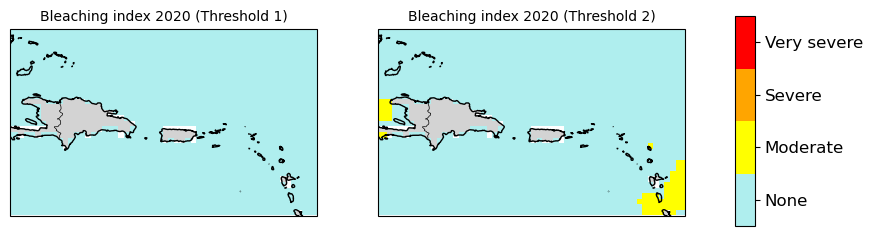

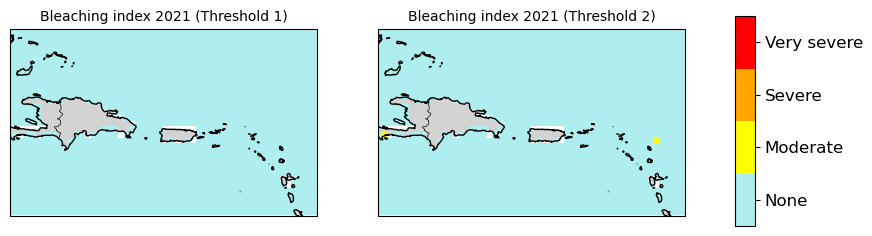

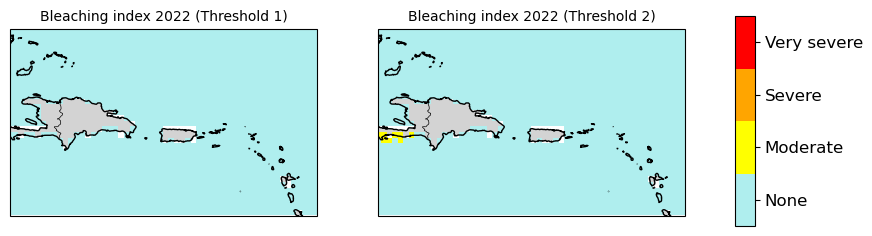

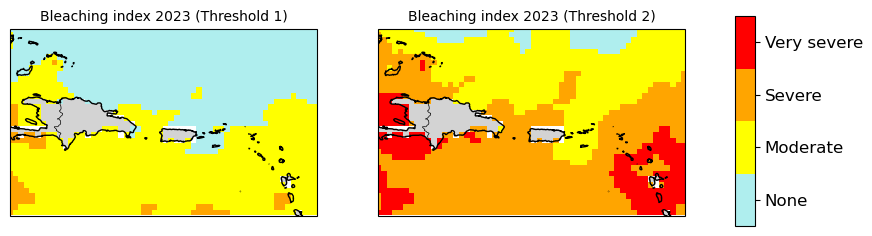

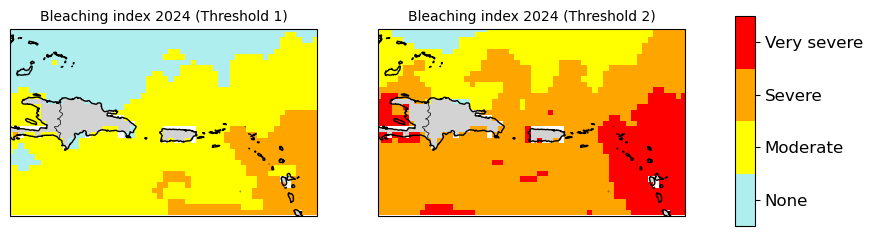

In [9]:
for year in np.arange(1990,2025,1):


    fig = plt.figure(figsize=(10, 3))
    
    ax = fig.add_subplot(1,2,1, projection=ccrs.PlateCarree())
    ax.set_title("Bleaching index " + str(year) +" (Threshold 1)",fontsize=10)
    ax.set_extent([lon_min-5, lon_max+2.8, lat_min-0.4, lat_max+2], crs=ccrs.PlateCarree())
    pc=ax.pcolormesh(lons, lats, ds.bleach_index1.sel(year=year), cmap=cmap,
                     vmin=0,vmax=4,
                     transform=ccrs.PlateCarree())
    ax.coastlines()
    
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, color='lightgray')
    
    ax = fig.add_subplot(1,2,2, projection=ccrs.PlateCarree())
    ax.set_title("Bleaching index " + str(year) + " (Threshold 2)",fontsize=10)
    ax.set_extent([lon_min-5, lon_max+2.8, lat_min-0.4, lat_max+2], crs=ccrs.PlateCarree())
    pc=ax.pcolormesh(lons, lats, ds.bleach_index2.sel(year=year), cmap=cmap,
                     vmin=0,vmax=4,
                     transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, color='lightgray')
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(pc, cax=cbar_ax, ticks=[0.5,1.5,2.5,3.5], pad=0.03)
    cbar.ax.set_yticklabels(['None', 'Moderate', 'Severe', 'Very severe'], fontsize=12) ;

    fig.savefig('/glade/work/kristenk/figs/PR_coralbleachindex_year'+str(year)+'.png', bbox_inches='tight', dpi=300, format='png');


    plt.show()